In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import time
from ast import literal_eval
from IPython import display
import numpy as np
import matplotlib.pyplot as plt
import multiprocessing as mp
import re
import os

In [21]:
number_of_players =3
color_palette = ['-b', '-g', '-r', '-c', '-m', '-y' , '-k', '-w'] 
goal_frequency_window = 20
frequency_window = 20


In [22]:
train_dir = os.getcwd() + '/training_sessions/'
training_dir_list = [x[0] for x in sorted([(fn, os.stat(train_dir + fn)) for fn in os.listdir(train_dir)], key = lambda x: x[1].st_ctime)]
training_path = train_dir + training_dir_list[-1]
print(training_dir_list)
print(training_path)


['.ipynb_checkpoints', '12_10_8_2_vs_2', '12_10_9_2_vs_2', '12_10_10_2_vs_2', '12_10_12_2_vs_2', '12_10_13_0_vs_0', '12_10_13_2_vs_2', '12_10_18_0_vs_0', '12_10_18_3_vs_3', '12_10_19_3_vs_3', '12_10_22_3_vs_3', '12_11_0_3_vs_3', '12_11_1_3_vs_3', '12_11_11_3_vs_3']
/home/andrew/Git/Robocup-Sigma/maddpg-pytorch/training_sessions/12_11_11_3_vs_3


number of episodes finished 275
number of time-steps finished 137500
OutOfTime      258
OutOfBounds     17
Name: why, dtype: int64


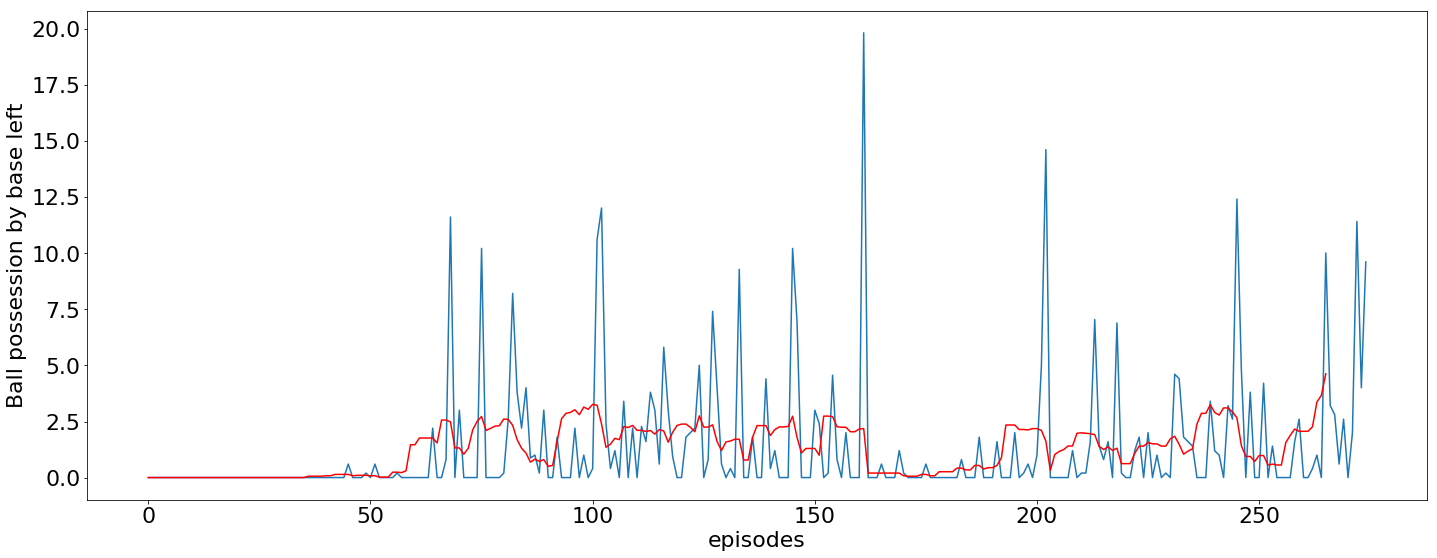

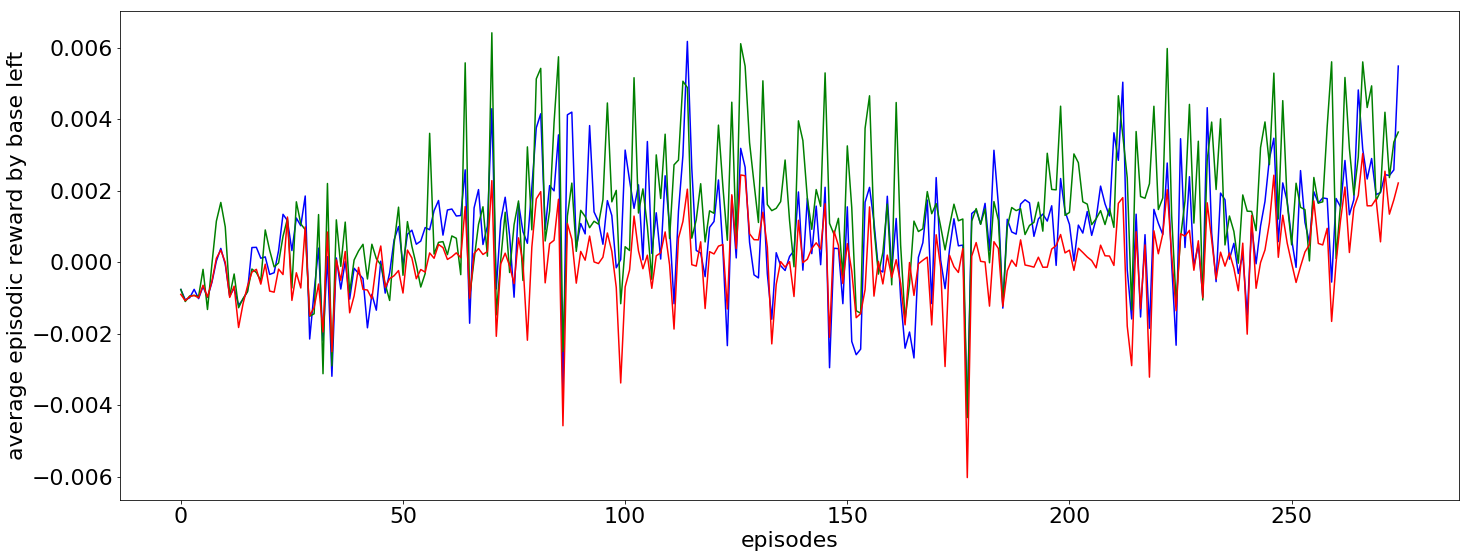

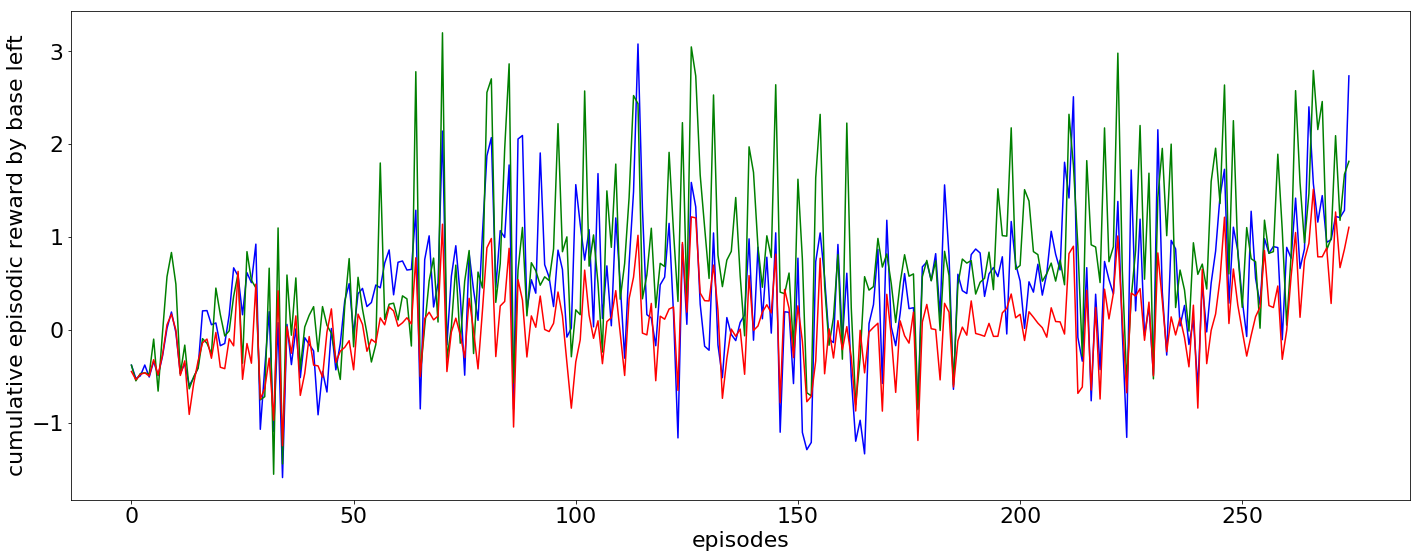

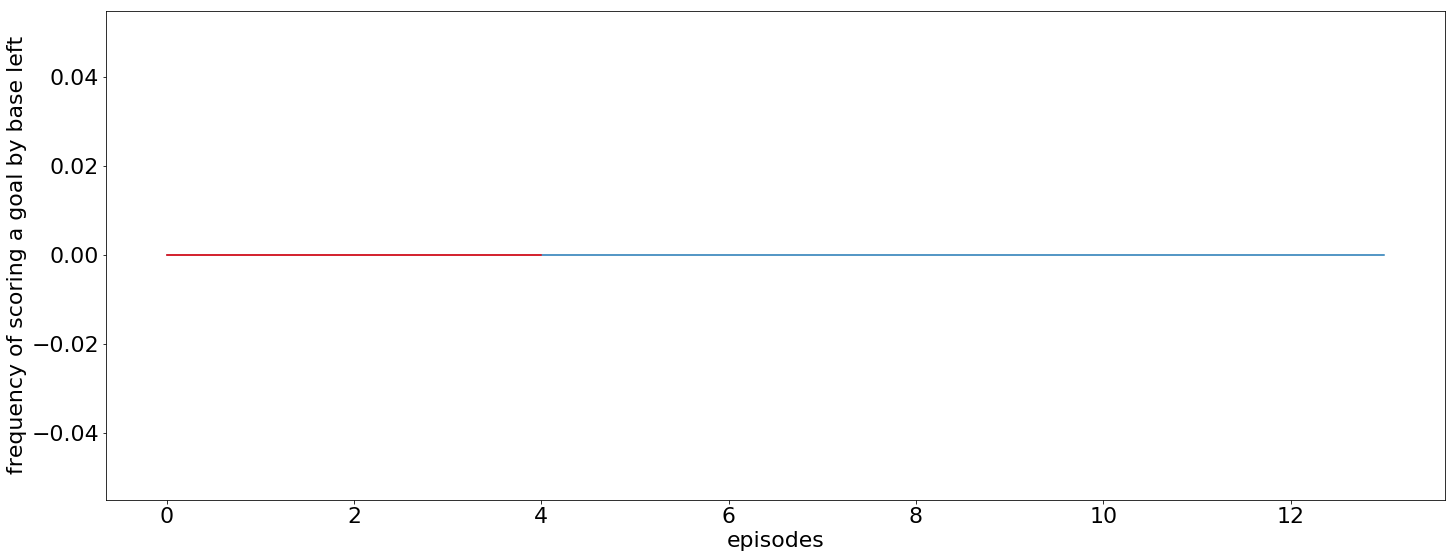

In [53]:
# Most recently created folder
data = pd.read_csv(training_path + '/history/team_history.csv', index_col=0)

# Manual input
# data = pd.read_csv('training_sessions/12_5_14_2_vs_2/history/team_history.csv')

print('number of episodes finished %d'%len(data))

print('number of time-steps finished %d'%(len(data)*500))

print(data.why.value_counts())


######################################---ball possession  and smoothed curve---#########################################################

plt.rcParams.update({'font.size': 22})
plt.figure(figsize=(24,9))
plt.plot(data.kickable_percentages  )
plt.plot( np.convolve(data.kickable_percentages, np.ones((10,))/10, mode='valid'), '-r' )
plt.xlabel('episodes')
plt.ylabel('Ball possession by base left')
plt.show()



######################################--- average episodic reward and smoothed curve-----#########################################################



team_reward = []
for j in range(number_of_players):
    player_reward = []
    for i in range(len(data)):
        player_reward.append(literal_eval(data.average_reward[i])[j])
    team_reward.append(player_reward)
                 
plt.rcParams.update({'font.size': 22})
plt.figure(figsize=(24,9))
for k in range(number_of_players):
    plt.plot(team_reward[k], color_palette[k])
#plt.plot( np.convolve(np.ravel(reward) , np.ones((10,))/10, mode='valid'), '-r' )
plt.xlabel('episodes')
plt.ylabel('average episodic reward by base left')
plt.show()

######################################--- cumulative episodic reward and smoothed curve-----#########################################################
team_reward = []
for j in range(number_of_players):
    player_reward = []
    for i in range(len(data)):
        player_reward.append(literal_eval(data.cumulative_reward[i])[j])
    team_reward.append(player_reward)
                 
plt.rcParams.update({'font.size': 22})
plt.figure(figsize=(24,9))
for k in range(number_of_players):
    plt.plot(team_reward[k], color_palette[k])
#plt.plot( np.convolve(np.ravel(reward) , np.ones((10,))/10, mode='valid'), '-r' )
plt.xlabel('episodes')
plt.ylabel('cumulative episodic reward by base left')
plt.show()

#####################################################


goal_freq = []
for i in range(0, len(data), goal_frequency_window):
    temp = data.loc[i:i+goal_frequency_window].why.value_counts()
    
    try: 
        goal_freq.append(temp.Goal_By_Left)
    except AttributeError:
        goal_freq.append(0)
        
plt.rcParams.update({'font.size': 22})
plt.figure(figsize=(24,9))
plt.plot(goal_freq)
plt.plot( np.convolve(np.ravel(goal_freq) , np.ones((10,))/10, mode='valid'), '-r' )
plt.xlabel('episodes')
plt.ylabel('frequency of scoring a goal by base left')
plt.show()


number of episodes finished 277
number of time-steps finished 138500


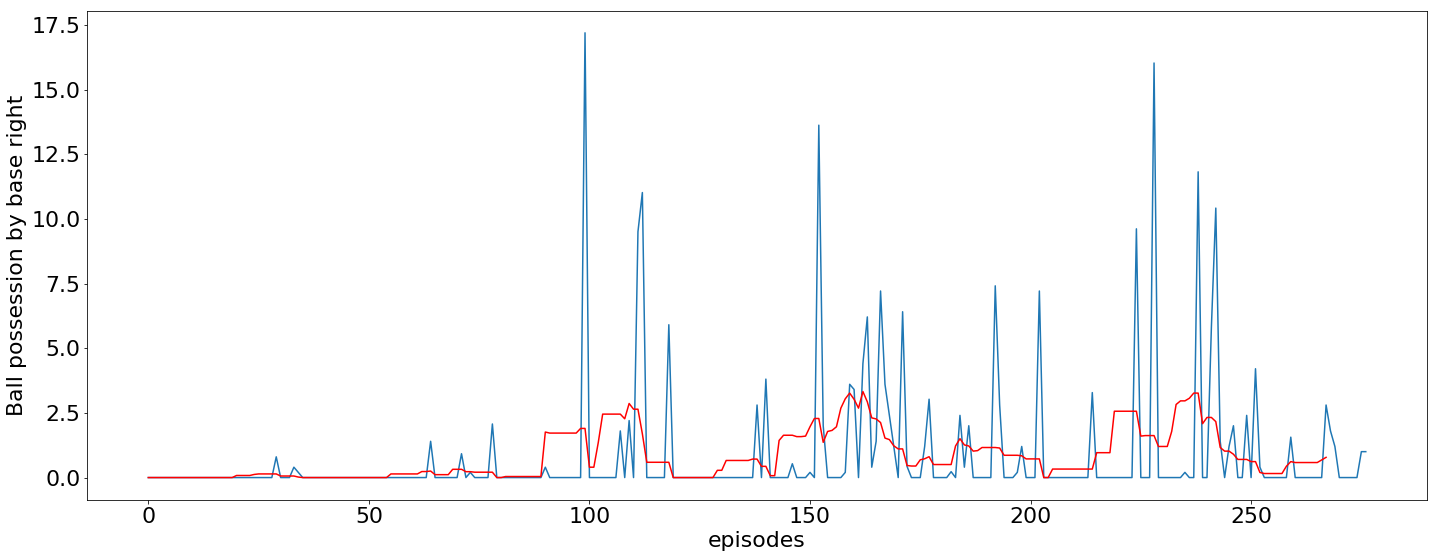

ValueError: malformed node or string: <_ast.Name object at 0x7fa9e952ceb8>

In [54]:

# Most recently created folder
data = pd.read_csv(training_path + '/history/opp_history.csv', index_col=0)
# Manual input
# data = pd.read_csv('training_sessions/12_5_14_2_vs_2/history/opp_history.csv')

print('number of episodes finished %d'%len(data))

print('number of time-steps finished %d'%(len(data)*500))

    
#print(data.why.value_counts())

goal_frequency_window = 20

######################################---ball possession  and smoothed curve---#########################################################

plt.rcParams.update({'font.size': 22})
plt.figure(figsize=(24,9))
plt.plot(data.kickable_percentages  )
plt.plot( np.convolve(data.kickable_percentages, np.ones((10,))/10, mode='valid'), '-r' )
plt.xlabel('episodes')
plt.ylabel('Ball possession by base right')
plt.show()



######################################--- average episodic reward and smoothed curve-----#########################################################


team_reward = []
for j in range(number_of_players):
    player_reward = []
    for i in range(len(data)):
        player_reward.append(literal_eval(data.average_reward[i])[j])
    team_reward.append(player_reward)
                 
plt.rcParams.update({'font.size': 22})
plt.figure(figsize=(24,9))
for k in range(number_of_players):
    plt.plot(team_reward[k], color_palette[k])
#plt.plot( np.convolve(np.ravel(reward) , np.ones((10,))/10, mode='valid'), '-r' )
plt.xlabel('episodes')
plt.ylabel('average episodic reward by base right')
plt.show()

######################################--- cumulative episodic reward and smoothed curve-----#########################################################
team_reward = []
for j in range(number_of_players):
    player_reward = []
    for i in range(len(data)):
        player_reward.append(literal_eval(data.cumulative_reward[i])[j])
    team_reward.append(player_reward)
                 
plt.rcParams.update({'font.size': 22})
plt.figure(figsize=(24,9))
for k in range(number_of_players):
    plt.plot(team_reward[k], color_palette[k])
#plt.plot( np.convolve(np.ravel(reward) , np.ones((10,))/10, mode='valid'), '-r' )
plt.xlabel('episodes')
plt.ylabel('cumulative episodic reward by base right')
plt.show()

#####################################################

goal_freq = []
for i in range(0, len(data), goal_frequency_window):
    temp = data.loc[i:i+goal_frequency_window].why.value_counts()
    
    try: 
        goal_freq.append(temp.Goal_By_Right)
    except AttributeError:
        goal_freq.append(0)
        
plt.rcParams.update({'font.size': 22})
plt.figure(figsize=(24,9))
plt.plot(goal_freq)
plt.plot( np.convolve(np.ravel(goal_freq) , np.ones((10,))/10, mode='valid'), '-r' )
plt.xlabel('episodes')
plt.ylabel('frequency of scoring a goal by base right')
plt.show()


In [38]:
csv_path = training_path + '/eval_history/'
csv_list = [x[0] for x in sorted([(fn, os.stat(csv_path + fn)) for fn in os.listdir(csv_path)], key = lambda x: x[1].st_ctime)]
print(csv_list)

['evaluation_ep100.csv']


number of episodes finished 10
number of time-steps finished 5000
Goal_By_Right    6
OutOfTime        4
Name: why, dtype: int64


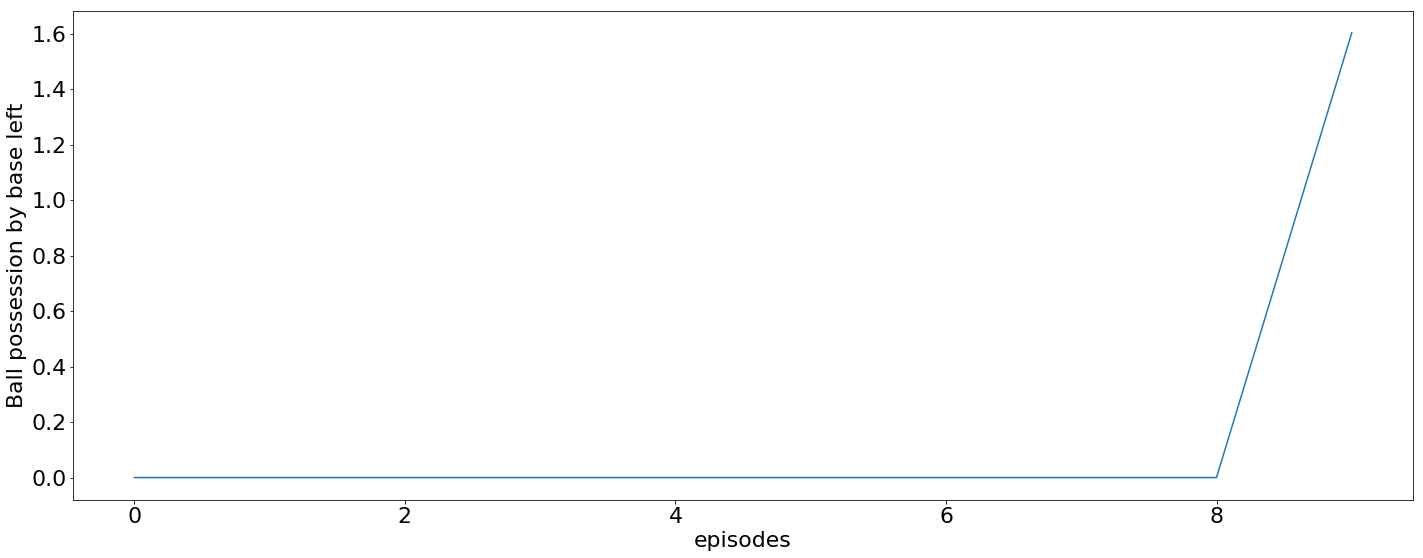

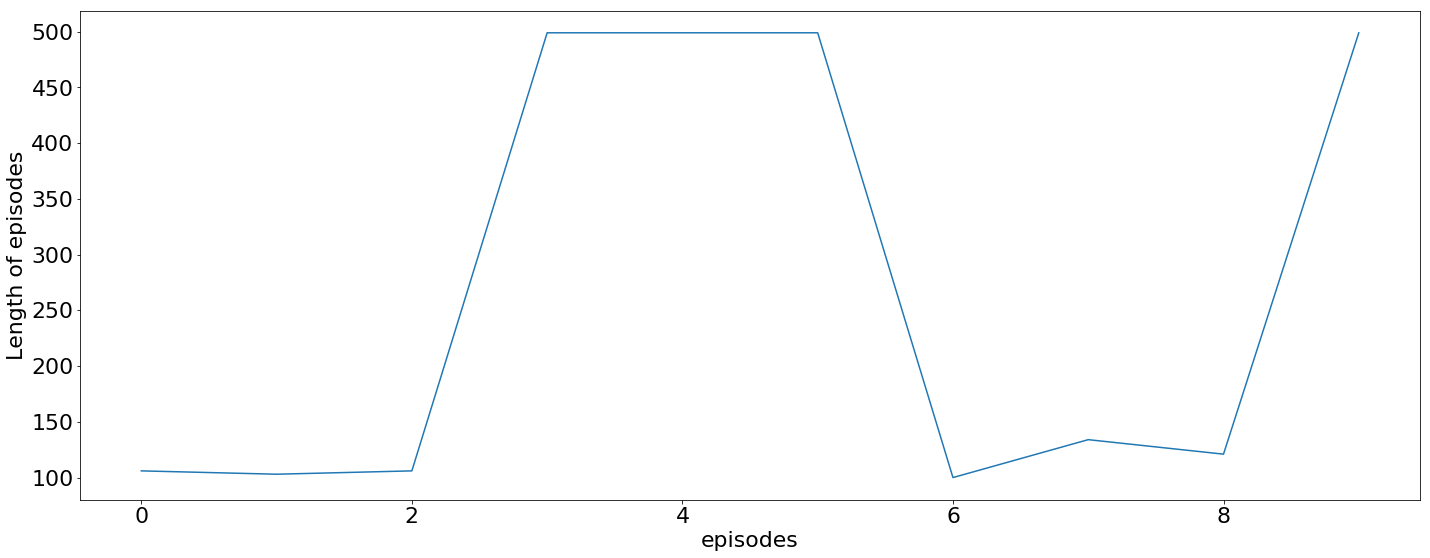

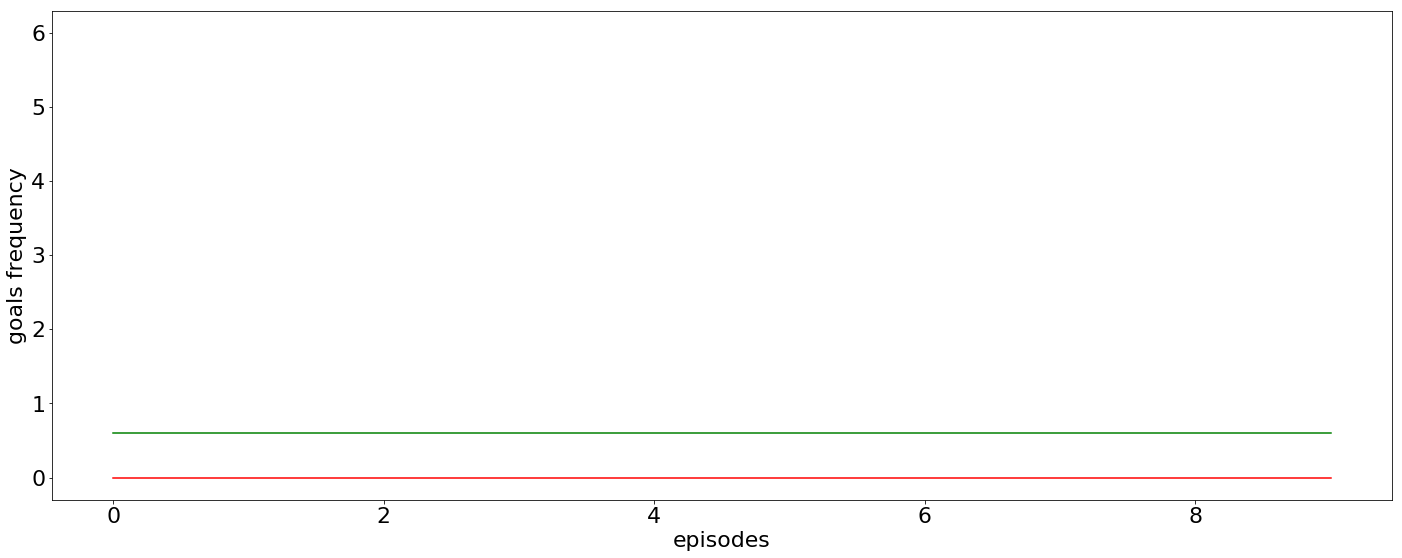

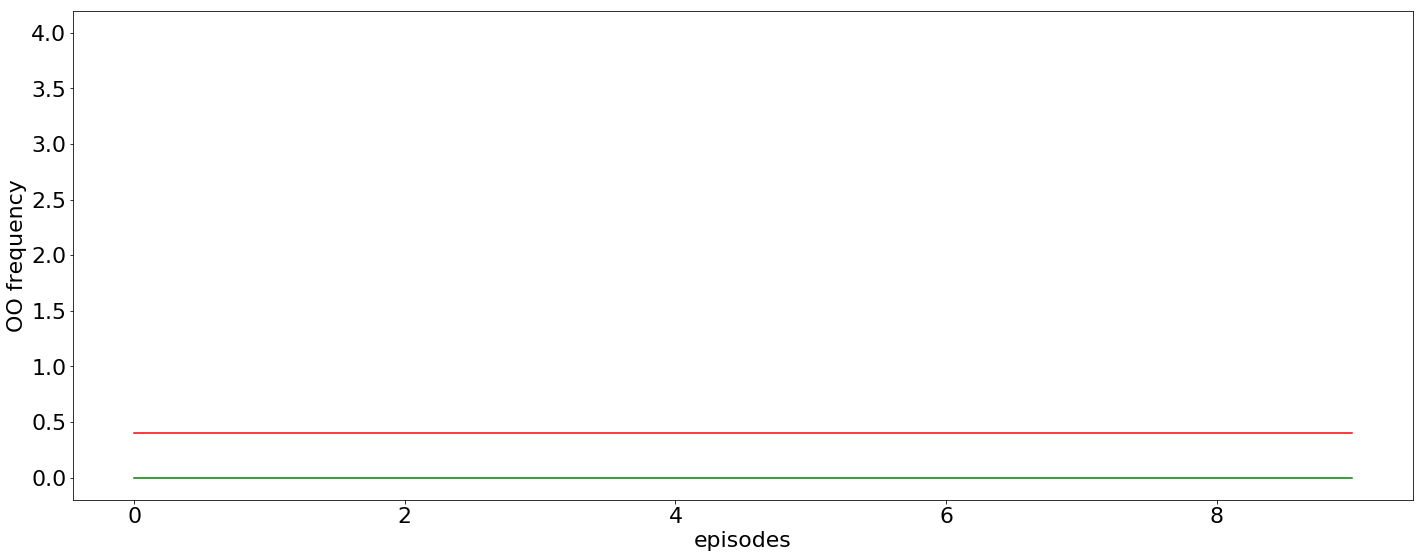

In [39]:
df_list = [pd.read_csv(csv_path + file, index_col=0) for file in csv_list]
data = pd.concat(df_list, ignore_index=True)
# data = pd.read_csv('training_sessions/12_5_14_2_vs_2/eval_history/evaluation_ep10.csv')

print('number of episodes finished %d'%len(data))

print('number of time-steps finished %d'%(len(data)*500))

    
print(data.why.value_counts())


######################################---ball possession  and smoothed curve---#########################################################

plt.rcParams.update({'font.size': 22})
plt.figure(figsize=(24,9))
plt.plot(data.kickable_percentages)
plt.plot( np.convolve(data.kickable_percentages, np.ones((10,))/10, mode='valid'), '-r' )
plt.xlabel('episodes')
plt.ylabel('Ball possession by base left')
plt.show()

######################################---episode time---#########################################################

plt.rcParams.update({'font.size': 22})
plt.figure(figsize=(24,9))
plt.plot(data.time_steps)
plt.plot( np.convolve(data.time_steps, np.ones((10,))/10, mode='valid'), '-r' )
plt.xlabel('episodes')
plt.ylabel('Length of episodes')
plt.show()


######################################--- why freq graphs-----#########################################################

goal_by_left_freq = []
goal_by_right_freq = []
OOT_freq = []
OOB_freq = []
for i in range(0, len(data), frequency_window):
    temp = data.loc[i:i+frequency_window].why.value_counts()
    
    try: 
        goal_by_left_freq.append(temp.Goal_By_Left)
    except AttributeError:
        goal_by_left_freq.append(0)
    
    try: 
        goal_by_right_freq.append(temp.Goal_By_Right)
    except AttributeError:
        goal_by_right_freq.append(0)
    
    try: 
        OOT_freq.append(temp.OutOfTime)
    except AttributeError:
        OOT_freq.append(0)
    
    try: 
        OOB_freq.append(temp.OutOfBounds)
    except AttributeError:
        OOB_freq.append(0)
        
plt.rcParams.update({'font.size': 22})
plt.figure(figsize=(24,9))
plt.plot(goal_by_left_freq, '-b')
plt.plot( np.convolve(np.ravel(goal_by_left_freq) , np.ones((10,))/10, mode='valid'), '-r' )
plt.plot(goal_by_right_freq, '-k')
plt.plot( np.convolve(np.ravel(goal_by_right_freq) , np.ones((10,))/10, mode='valid'), '-g' )
plt.xlabel('episodes')
plt.ylabel('goals frequency')
plt.show()

plt.rcParams.update({'font.size': 22})
plt.figure(figsize=(24,9))
plt.plot(OOT_freq, '-b')
plt.plot( np.convolve(np.ravel(OOT_freq) , np.ones((10,))/10, mode='valid'), '-r' )
plt.plot(OOB_freq, '-k')
plt.plot( np.convolve(np.ravel(OOB_freq) , np.ones((10,))/10, mode='valid'), '-g' )
plt.xlabel('episodes')
plt.ylabel('OO frequency')
plt.show()